In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [24]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 76.4+ KB


In [26]:
data.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


In [2]:
# Drop columns with many NA and other rows with NA
data.drop("Age", axis=1, inplace=True)
data.drop("Cabin", axis=1, inplace=True)
data.dropna(inplace=True)

In [3]:
# Split dataset in features and target variable and change categorical values to dummies
feature_cols = ["Pclass", "Sex", "SibSp", "Parch", "Fare", "Embarked"]
categorical_cols = ["Pclass", "Sex", "Embarked"]
X = data[feature_cols] # Features
X = pd.get_dummies(X, columns = categorical_cols)
y = data.Survived # Target variable

In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.head(10)

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
121,0,0,8.0500,0,0,1,0,1,0,0,1
687,0,0,10.1708,0,0,1,0,1,0,0,1
790,0,0,7.7500,0,0,1,0,1,0,1,0
837,0,0,8.0500,0,0,1,0,1,0,0,1
659,0,2,113.2750,1,0,0,0,1,1,0,0
266,4,1,39.6875,0,0,1,0,1,0,0,1
502,0,0,7.6292,0,0,1,1,0,0,1,0
792,8,2,69.5500,0,0,1,1,0,0,0,1
186,1,0,15.5000,0,0,1,1,0,0,1,0
572,0,0,26.3875,1,0,0,0,1,0,0,1


In [5]:
# Create Decision Tree classifier object
dt = DecisionTreeClassifier( max_depth=3)

# Train Decision Tree classifier
dt = dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.848314606741573


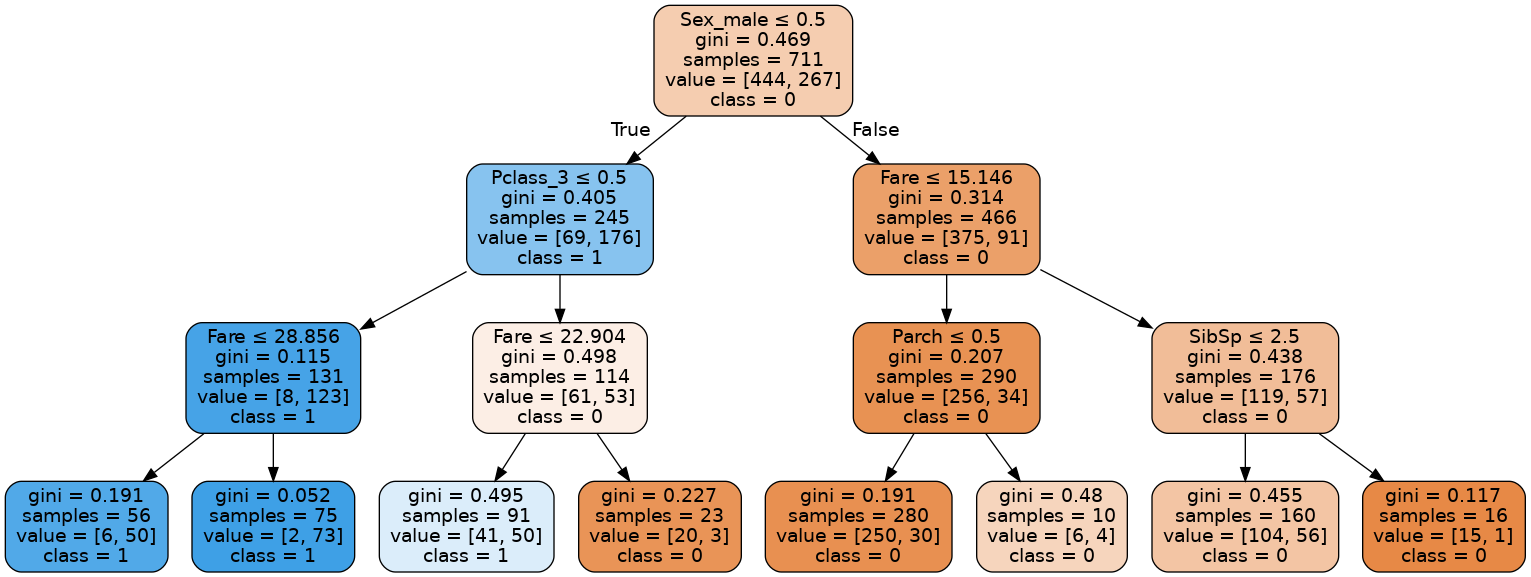

In [6]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())


In [7]:
results = pd.read_csv("test.csv")
X_results = results[feature_cols]
X_results = pd.get_dummies(X_results, columns = categorical_cols)


In [8]:
X_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SibSp       418 non-null    int64  
 1   Parch       418 non-null    int64  
 2   Fare        417 non-null    float64
 3   Pclass_1    418 non-null    uint8  
 4   Pclass_2    418 non-null    uint8  
 5   Pclass_3    418 non-null    uint8  
 6   Sex_female  418 non-null    uint8  
 7   Sex_male    418 non-null    uint8  
 8   Embarked_C  418 non-null    uint8  
 9   Embarked_Q  418 non-null    uint8  
 10  Embarked_S  418 non-null    uint8  
dtypes: float64(1), int64(2), uint8(8)
memory usage: 13.2 KB


In [13]:
X_results[X_results["Fare"].isna()]

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
152,0,0,NaN,0,0,1,0,1,0,0,1


In [14]:
X_results_cleaned = X_results.dropna()

In [15]:
results_predict = dt.predict(X_results_cleaned)

In [16]:
print(results_predict)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1
 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 1 0 0 0]


In [19]:
passenger_id = results["PassengerId"]
print(list(passenger_id))

[892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 107

In [21]:
final = pd.DataFrame({"PassengerId": passenger_id,
                      "Survived": list(results_predict[:152]) + [0] + list(results_predict[152:])})

In [23]:
final.to_csv('submission.csv', index=False)